# 1차원 데이터

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/ch2_scores_em.csv", index_col = "student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
scores_df = pd.DataFrame(scores, index = pd.Index(list("ABCDEFGHIJ"),name = "student"), columns = ["English"])
scores_df

,English
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [5]:
np.mean(scores)
scores_df.mean()

English    55.0
dtype: float64

In [6]:
np.median(scores)
scores_df.median()

English    56.5
dtype: float64

In [7]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [8]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n-1)//2]
    
median

56.5

In [9]:
# 최빈값 구하기
scores_df.mode()

,English
0,65


In [10]:
pd.Series(sorted_scores).mode()

0    65
dtype: int64

In [11]:
scores_df.describe()

,English
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='English', ylabel='Density'>

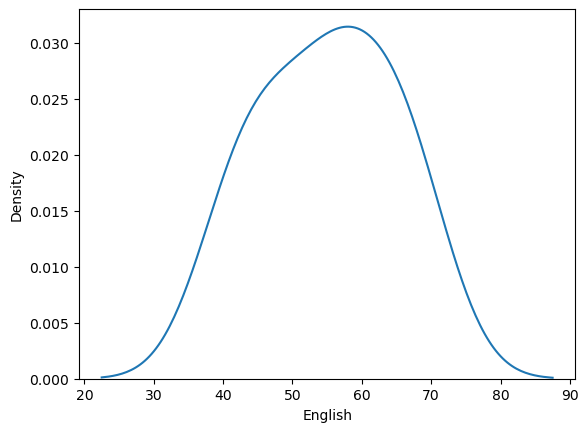

In [12]:
sns.kdeplot(data = scores_df, x = "English")

<AxesSubplot:xlabel='English', ylabel='Count'>

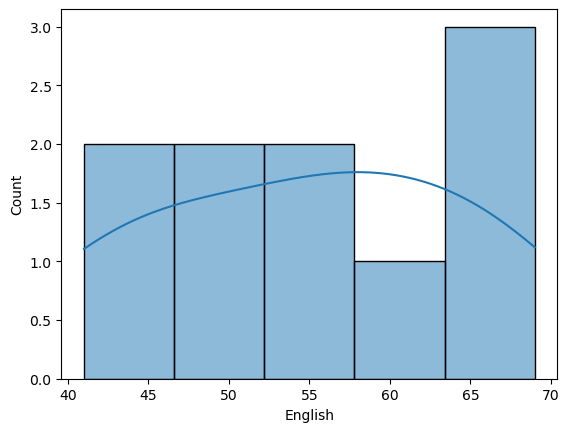

In [13]:
#scores_df.iloc[9,0] = 300
sns.histplot(data = scores_df, x = "English", kde = True)

In [14]:
scores_df.describe()

,English
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


In [15]:
mean = np.mean(scores)
print(mean)
print(scores)
deviation = scores - mean
print(deviation)

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [16]:
print(sum(deviation))
print(np.mean(deviation))

0.0
0.0


#### 분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산. 
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨
 
[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [17]:
print(np.mean(deviation **2))
print(np.var(scores))

86.0
86.0


In [18]:
scores_df.var()

English    95.555556
dtype: float64

In [19]:
# 표준편차
print(np.sqrt(np.var(scores, ddof = 0)))
print(np.std(scores, ddof = 0))

9.273618495495704
9.273618495495704


In [20]:
# 범위와 4분위수
# 범위
np.max(scores) - np.min(scores)

28

In [21]:
# 4분위수
scores_Q1 = np.percentile(scores, 25)
scores_Q2 = np.percentile(scores, 50)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
print(scores_Q1)
print(scores_Q2)
print(scores_Q3)
print(scores_IQR)

48.25
56.5
63.25
15.0


In [22]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [23]:
print(scores)
print(f"평균 : {scores.mean()}, 표준 편차 : {scores.std().round(4)}")

[42 69 56 41 57 48 65 49 65 58]
평균 : 55.0, 표준 편차 : 9.2736


In [24]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [25]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [26]:
freq,_ = np.histogram(english_scores,bins = 10, range = (0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [27]:
freq_class = [f"{i}-{i+10}" for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({"frequency" : freq}, index = pd.Index(freq_class, name = "class"))
freq_dist_df

,frequency
class,
0-10,0
10-20,0
20-30,0
30-40,2
40-50,8
50-60,16
60-70,18
70-80,6
80-90,0


<AxesSubplot:xlabel='frequency', ylabel='Count'>

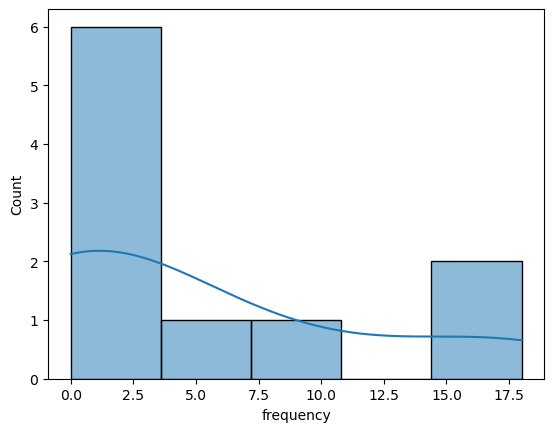

In [28]:
sns.histplot(data = freq_dist_df, x = "frequency", kde = True)

In [29]:
# 계급값 : 각 계급을 대표하는 값으로, 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [30]:
# 상대도수 : 해당 계습 데이터의 상대적인 비율
rel_freq = freq/ freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [31]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [32]:
freq_dist_df["class_value"] = class_value
freq_dist_df["relative_frequency"] = rel_freq
freq_dist_df["cumulative_frequency"] = cum_rel_freq
freq_dist_df[["class_value","frequency","relative_frequency","cumulative_frequency"]]

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0-10,5,0,0.00,0.00
10-20,15,0,0.00,0.00
20-30,25,0,0.00,0.00
30-40,35,2,0.04,0.04
40-50,45,8,0.16,0.20
50-60,55,16,0.32,0.52
60-70,65,18,0.36,0.88
70-80,75,6,0.12,1.00
80-90,85,0,0.00,1.00


In [33]:
# 최빈값
freq_dist_df.loc[freq_dist_df.frequency.idxmax(), "class_value"]

65

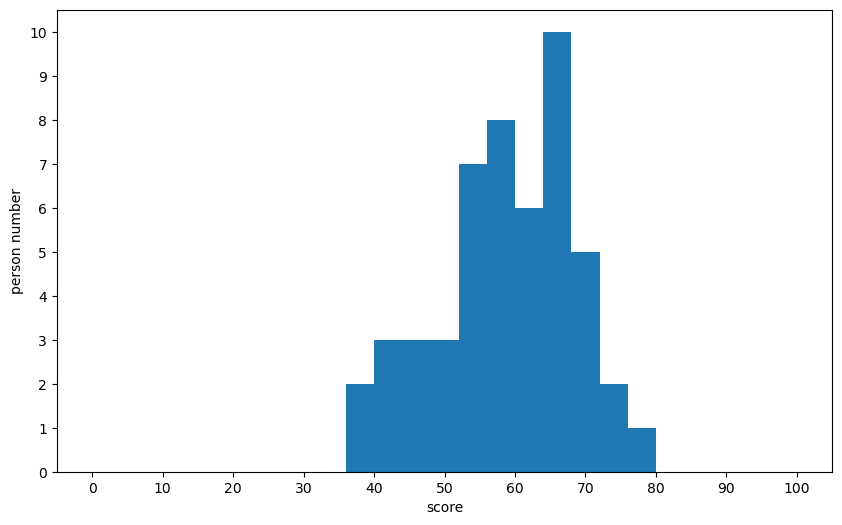

In [34]:
# 히스토그램
plt.figure(figsize = (10,6))

freq,_,_ = plt.hist(english_scores, bins = 25, range = (0,100))
plt.xlabel("score")
plt.ylabel("person number")
plt.xticks(np.linspace(0,100,10+1))
plt.yticks(np.arange(0,freq.max()+1))
plt.show()

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  3.,  3.,
         7.,  8.,  6., 10.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

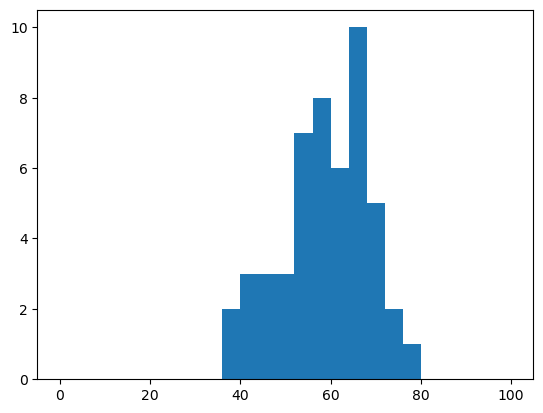

In [35]:
plt.hist(english_scores, bins = 25, range = (0, 100))

#### 과제 
클래스별 빈도를 나타내는 히스토그램에 추가하여 누적 상대도수(y축 왼쪽)를 꺾은선 그래프로 표현하시오

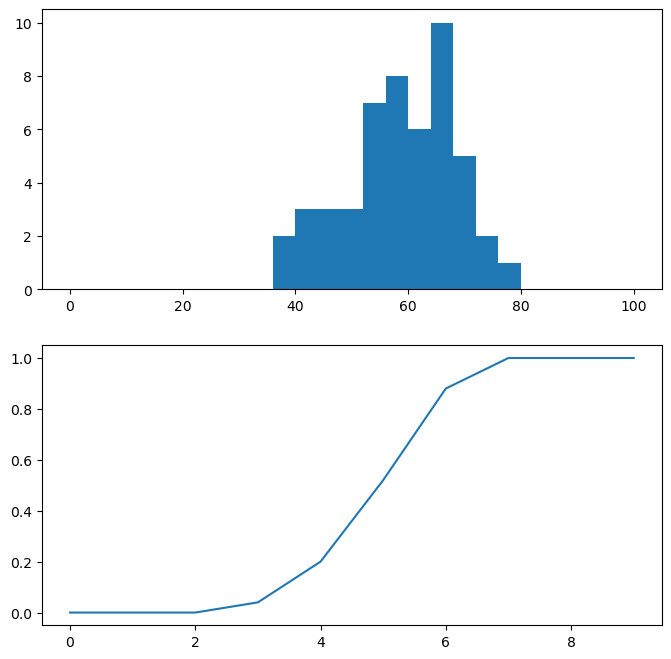

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].hist(english_scores, bins = 25, range = (0, 100))
axs[1].plot(cum_rel_freq)

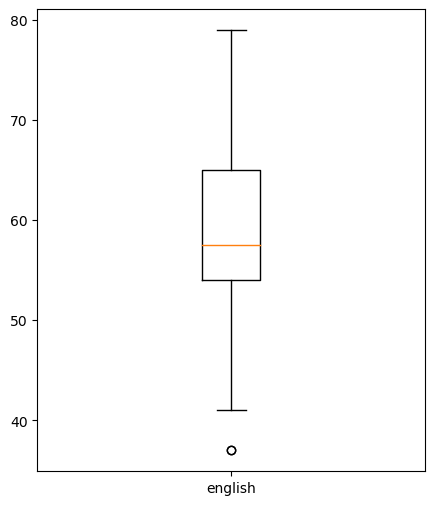

In [37]:
# box plot
fig = plt.figure(figsize = (5,6))
plt.boxplot(english_scores,labels=['english'])
plt.show()

In [38]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

#### 과제

타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개를 선택하여 각 컬럼의 특징을 설명하고
종속 변수인 survived와의 관계를 기술하시오.
- 각 컬럼에 대한 전처리 후 기초 통계량, 시각화를 통한 분포 및 특징 탐색, 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용할 수 있는 형태로 변환

### 과제3.
타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개의 쌍을 선택하여 공분산 행렬및 상관계수 행렬을 각각 구하여 비교하세요.

In [39]:
df = pd.read_csv("data/titanic3.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [40]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [41]:
df.dropna(axis = 1, thresh = 800, inplace = True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C


In [42]:
import re

# 정규표현식 패턴
pattern = r',\s*([\w\s]+)\.'

# Name 컬럼(column)에서 호칭(prefix)을 추출하여 새로운 컬럼(column) Title에 저장
df['Title'] = df['name'].str.extract(pattern)[0]

# 결과 확인
print(df['Title'].value_counts())

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: Title, dtype: int64


In [43]:
a = df[["Title","age"]].groupby(["Title"]).mean()
a

,age
Title,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [44]:
dic = a["age"].to_dict()
dic

{'Capt': 70.0,
 'Col': 54.0,
 'Don': 40.0,
 'Dona': 39.0,
 'Dr': 43.57142857142857,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 5.482641509433962,
 'Miss': 21.774238095238097,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.25215146299484,
 'Mrs': 36.99411764705882,
 'Ms': 28.0,
 'Rev': 41.25,
 'Sir': 49.0,
 'the Countess': 33.0}

In [45]:
df['age'].fillna(df['Title'].map(dic), inplace=True)
df["age"] = round(df["age"],0)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,S,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.0,1,0,2665,14.4542,C,Miss
1305,3,0,"Zabour, Miss. Thamine",female,22.0,1,0,2665,14.4542,C,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.0,0,0,2656,7.2250,C,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,C,Mr


In [46]:
df.embarked.replace(np.nan, 'C', inplace=True)
df.drop(["ticket"], axis =1, inplace = True)

In [47]:
def age_cat(age) :
    
    cat = ''
    
    if age <= 10 : cat = 'Kids'
    elif age <= 25 : cat = 'Young'
    elif age <= 35 : cat = 'Adult'
    elif age <= 50 : cat = 'Mature'
    else : cat = 'Elderly'
    
    return cat

df['age_cat'] = df.age.apply(lambda x: age_cat(x))
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S,Miss,Adult
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,151.5500,S,Master,Kids
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,Miss,Kids
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S,Mr,Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,Mrs,Young
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.0,1,0,14.4542,C,Miss,Young
1305,3,0,"Zabour, Miss. Thamine",female,22.0,1,0,14.4542,C,Miss,Young
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.0,0,0,7.2250,C,Mr,Adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,7.2250,C,Mr,Adult


In [48]:
df.drop(["name"], axis = 1, inplace =True)

In [49]:
df["fare"].fillna(df["fare"].mean(), inplace = True)

In [50]:
df.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.379014,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.064706,-0.027825,0.082660,0.244208
age,-0.379014,-0.064706,1.000000,-0.220191,-0.137841,0.170762
sibsp,0.060832,-0.027825,-0.220191,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.137841,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.170762,0.160224,0.221522,1.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

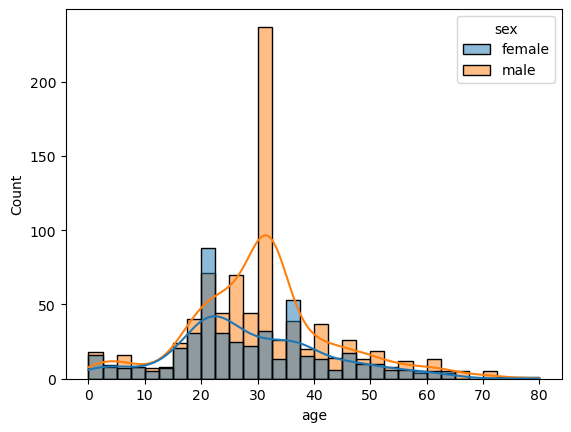

In [51]:
sns.histplot(data = df, x = "age", kde = True, hue = "sex")

<AxesSubplot:xlabel='age', ylabel='Count'>

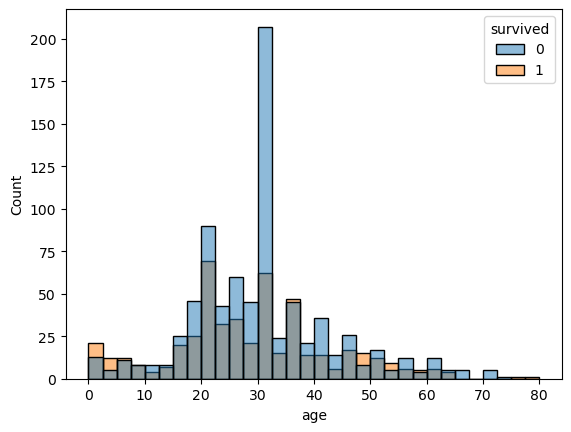

In [52]:
sns.histplot(data = df, x = "age", hue = "survived")

Text(0, 0.5, 'count')

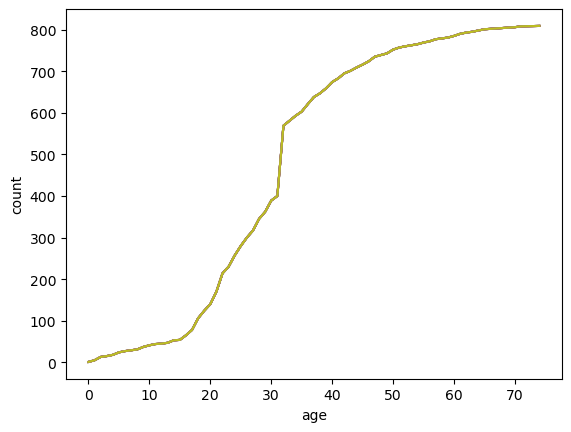

In [53]:
df_dead = df[df["survived"] == 0]
counts = df_dead.groupby('age').count().cumsum()
plt.plot(counts.index, counts.values)
plt.xlabel('age')
plt.ylabel('count')


In [54]:
Q1 = df.fare.describe()["25%"]
Q3 = df.fare.describe()["75%"]
IQR = Q3 - Q1
abv = df[(df["fare"] <= (Q1 - IQR*1.5)) | (df["fare"] >= (Q3+IQR*1.5))]
abv

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title,age_cat
0,1,1,female,29.0,0,0,211.3375,S,Miss,Adult
1,1,1,male,1.0,1,2,151.5500,S,Master,Kids
2,1,0,female,2.0,1,2,151.5500,S,Miss,Kids
3,1,0,male,30.0,1,2,151.5500,S,Mr,Adult
4,1,0,female,25.0,1,2,151.5500,S,Mrs,Young
...,...,...,...,...,...,...,...,...,...,...
1176,3,0,male,32.0,8,2,69.5500,S,Mr,Adult
1177,3,0,male,32.0,8,2,69.5500,S,Mr,Adult
1178,3,0,male,32.0,8,2,69.5500,S,Mr,Adult
1179,3,0,male,32.0,1,9,69.5500,S,Mr,Adult


In [55]:
df1 = df.copy()
df1.drop(abv.index, inplace=True)
df1

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title,age_cat
5,1,1,male,48.0,0,0,26.5500,S,Mr,Mature
7,1,0,male,39.0,0,0,0.0000,S,Mr,Mature
8,1,1,female,53.0,2,0,51.4792,S,Mrs,Elderly
9,1,0,male,71.0,0,0,49.5042,C,Mr,Elderly
14,1,1,male,80.0,0,0,30.0000,S,Mr,Elderly
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.0,1,0,14.4542,C,Miss,Young
1305,3,0,female,22.0,1,0,14.4542,C,Miss,Young
1306,3,0,male,26.0,0,0,7.2250,C,Mr,Adult
1307,3,0,male,27.0,0,0,7.2250,C,Mr,Adult


<AxesSubplot:xlabel='fare', ylabel='Count'>

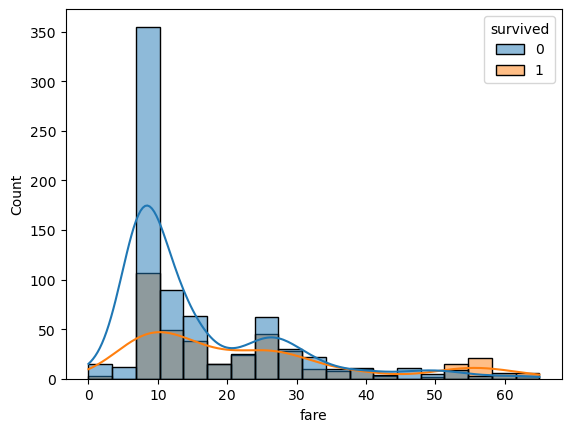

In [56]:
sns.histplot(data = df1, x = "fare", kde = True, hue = "survived")

<AxesSubplot:xlabel='fare', ylabel='Count'>

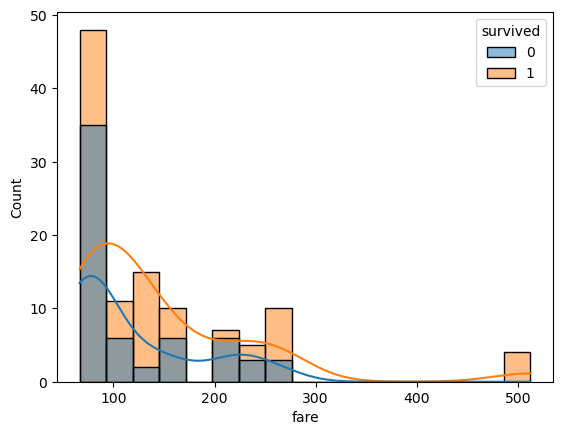

In [57]:
sns.histplot(data = abv, x = "fare", kde = True, hue = "survived")

In [58]:
df[["age","pclass","fare","sex","embarked"]]

cov1 = df[["age","fare"]].cov()
cov2 = df[["pclass","fare"]].cov()

corr1 = df[["age","fare"]].corr()
corr2 = df[["pclass","fare"]].corr()
print(cov1)
print(cov2)
print(corr1)
print(corr2)

             age         fare
age   173.898085   116.508253
fare  116.508253  2676.911604
           pclass         fare
pclass   0.701969   -24.209265
fare   -24.209265  2676.911604
           age      fare
age   1.000000  0.170762
fare  0.170762  1.000000
          pclass      fare
pclass  1.000000 -0.558477
fare   -0.558477  1.000000


# 2차원 데이터

In [59]:
df = pd.read_csv("data/ch2_scores_em.csv", index_col = "student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [60]:
en_scores = np.array(df["english"])[:10]
ma_scores = np.array(df["mathematics"])[:10]

scores_df = pd.DataFrame({"english" : en_scores,
                         "mathematics" : ma_scores},
                        index = pd.Index(list("ABCDEFGHIJ")))
scores_df

,english,mathematics
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78
J,58,82


In [61]:
# 공분산
# 공분산이 양수인 경우 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있으며, 
# 음수인 경우 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있습니다. 
# 공분산이 0에 가까운 경우 두 변수 사이에는 거의 상관관계가 없다고 볼 수 있습니다.
summary_df = scores_df.copy()
summary_df["english_deviation"] = summary_df.english - summary_df.english.mean()
summary_df["mathematics_deviation"] = summary_df.mathematics - summary_df.mathematics.mean()
summary_df["product of deviation"] = summary_df["english_deviation"] * summary_df["mathematics_deviation"]
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0
J,58,82,3.0,10.6,31.8


In [62]:
np.var(scores_df.english)

86.0

In [63]:
summary_df["product of deviation"].mean()

62.8

In [64]:
# 상관계수
np.cov(en_scores, ma_scores, ddof = 0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [65]:
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [66]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


Text(0, 0.5, 'Math')

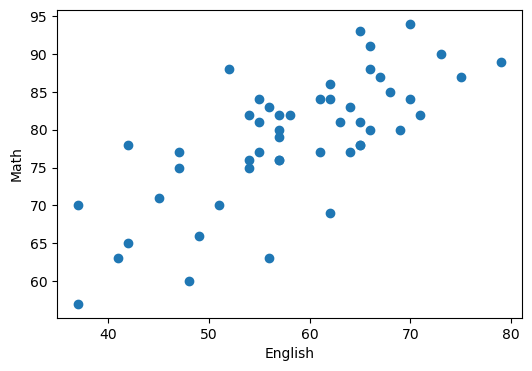

In [67]:
english_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

plt.figure(figsize=(6,4))
plt.scatter(english_scores, math_scores)
plt.xlabel("English")
plt.ylabel("Math")

<AxesSubplot:>

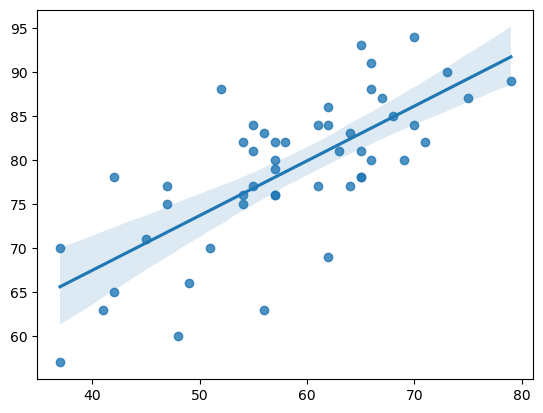

In [68]:
sns.regplot(data = df, x = english_scores, y = math_scores)

In [69]:
poly_fit = np.polyfit(english_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)
eq = f"{poly_fit[1] : .2f}+{poly_fit[0] : .2f}x"
eq

' 42.60+ 0.62x'

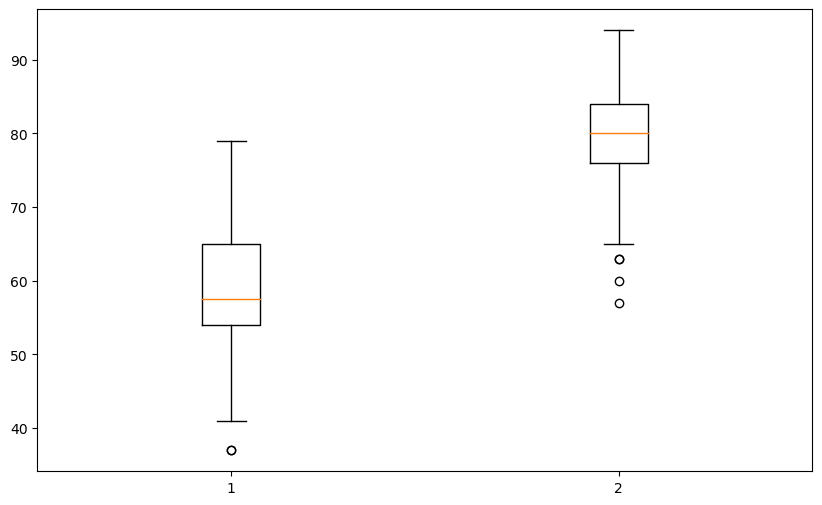

In [70]:
plt.figure(figsize = (10,6))
plt.boxplot([english_scores, math_scores])
plt.show()

#### 과제 1_0411
english와 mathematics 2차원 데이터간의 관계를 파악할 수 있는 시각화

<AxesSubplot:>

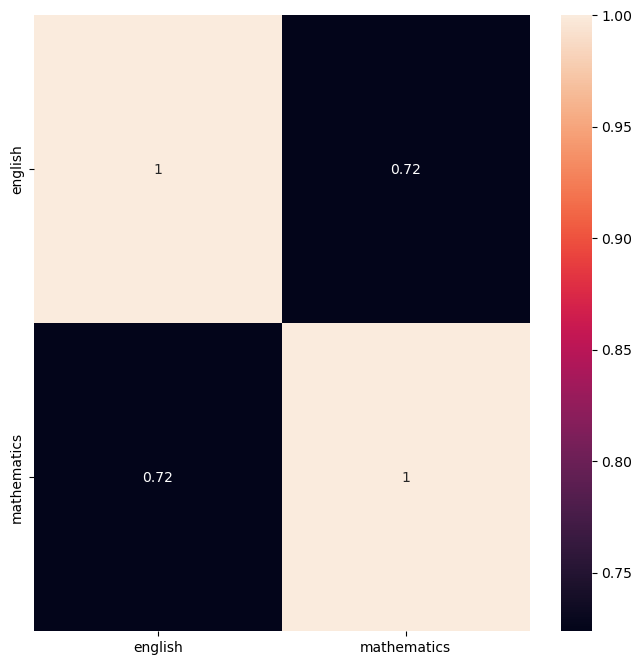

In [71]:
plt.figure(figsize = (8,8))
sns.heatmap(df[["english","mathematics"]].corr(), annot = True)

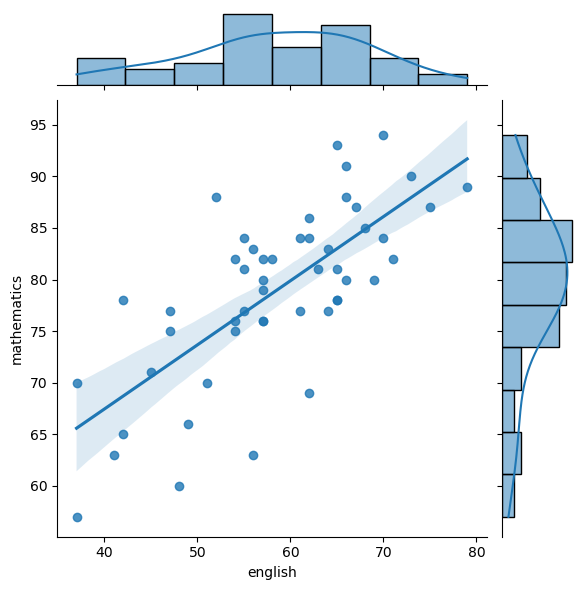

In [73]:
sns.jointplot(data =df, x = "english", y = "mathematics", kind = "reg")